# Importing Libraries

In [1]:
import sys
sys.path.append('..')

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from letcon.src.utils.utils import get_data_statistics, get_missing_values_stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib.pyplot import xticks
from sklearn.svm import SVC

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
import pandas_profiling as pp
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

Initializing Logger Path...
Logger Path Exists...
Path for Logger-->C:/Users/SPARS/Desktop/LETCON-Conference/letcon2020-ml-workshop/notebooks/Logs/
Initializing Artifacts Path...
Artifacts Path Exists...
Path for Artifacts-->C:/Users/SPARS/Desktop/LETCON-Conference/letcon2020-ml-workshop/notebooks/Artifacts/


# Loading Data

In [3]:
TrainData = pd.read_csv('data/wine-quality/winequality-white-updated.csv')

## Preliminary Data Statistics

### View Sample DataFrame

In [4]:
get_data_statistics(data=TrainData)

DataFrame Contains 4898 Rows & 12 Columns

Sample DataFrame: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  

### Analyze Missing Value % in DataFrame

In [5]:
get_missing_values_stats(data=TrainData)

DataFrame has 12 columns and 4898 rows.
There are 0 columns that have missing values

Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []



### Basic Statistics About Data

In [7]:
TrainData.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Let's begin our manual EDA

- Exploratory Data Analysis is a process where we tend to analyze the dataset and summarize the main characteristics of the dataset often using visual methods. 
- EDA is really important because if you are not familiar with the dataset you are working on, then you won’t be able to infer something from that data. 
- However, EDA generally takes a lot of time.

## Correlation HeatMap

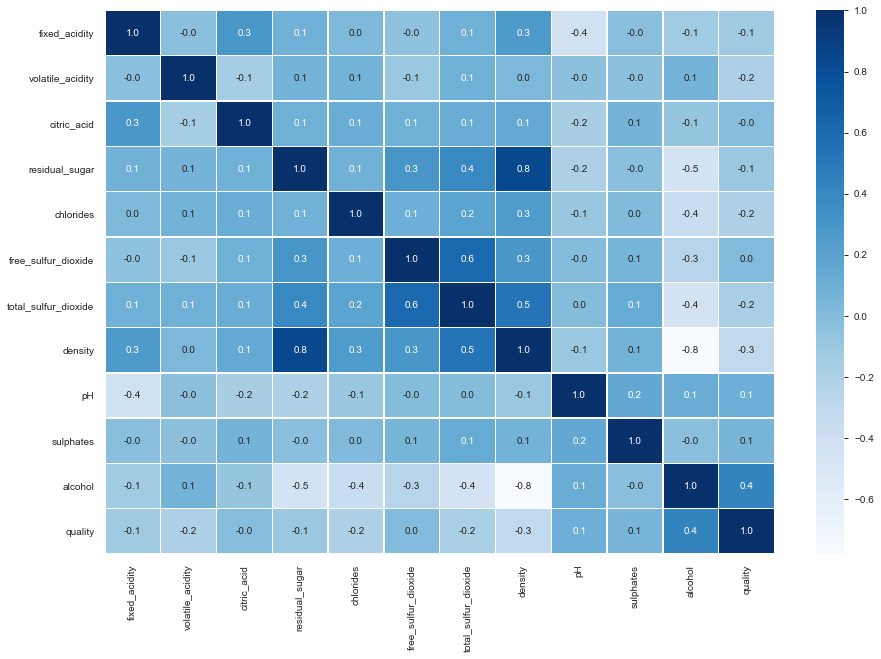

In [8]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(TrainData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='Blues')

## Visualizing the output y-variable using bar plot

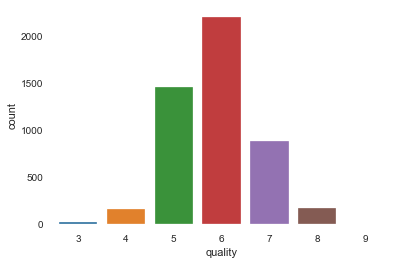

In [9]:
sns.countplot(x='quality', data=TrainData)

## Let's analyse the distribution of data points using swarn plot between quality and fixed acidity

Text(0.5, 1.0, 'fixed_acidity vs quality')

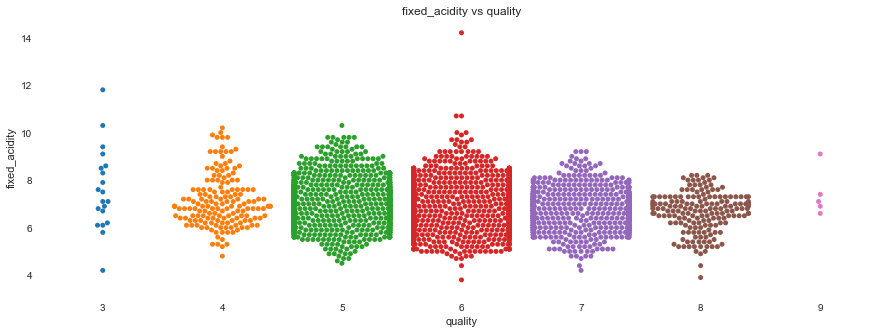

In [10]:
plt.figure(figsize=(15,5))
sns.swarmplot(x= "quality", y="fixed_acidity" , data = TrainData) 
plt.title('fixed_acidity vs quality')

## Let's analyse the distribution of data points using box plot between quality and fixed acidity

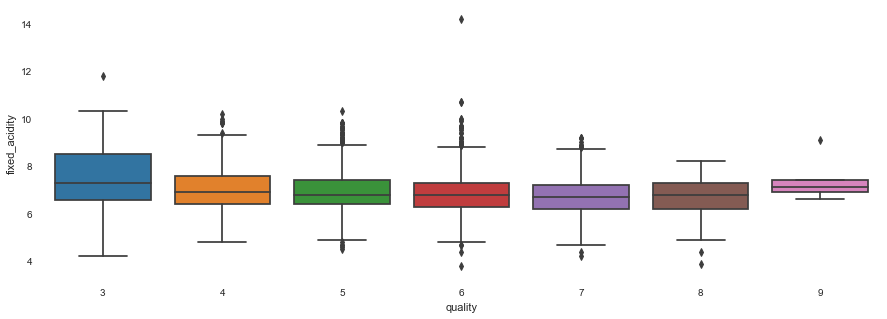

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="fixed_acidity", data=TrainData)

## Let's analyse the mean behaviour between quality and fixed acidity

Text(0, 0.5, 'fixed_acidity')

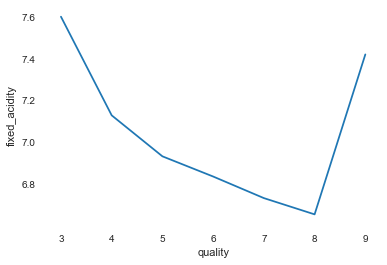

In [12]:
TrainData.groupby('quality')['fixed_acidity'].mean().plot.line()
plt.ylabel("fixed_acidity")

## Analysing the distribution of data points using bar plot between quality and volatile_acidity

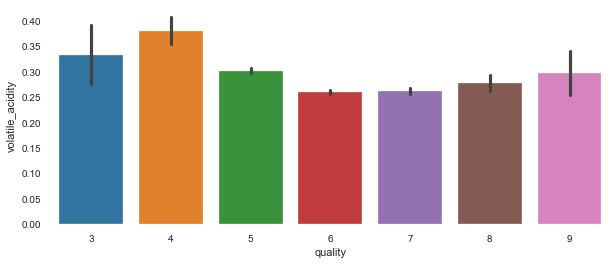

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="volatile_acidity", data=TrainData)

## Let's analyse the mean behaviour between quality and volatile_acidity

Text(0, 0.5, 'volatile_acidity')

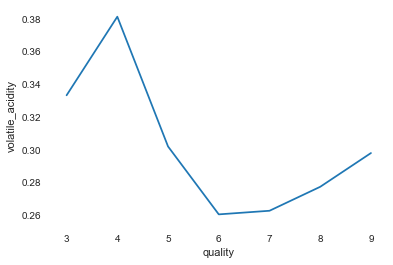

In [14]:
TrainData.groupby('quality')['volatile_acidity'].mean().plot.line()
plt.ylabel("volatile_acidity")

## Analysing the distribution of data points using bar plot between quality and sulphates

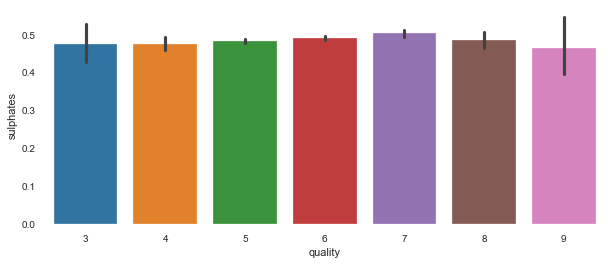

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="sulphates", data=TrainData)

## Let's analyse the mean behaviour between quality and sulphates

Text(0, 0.5, 'sulphates')

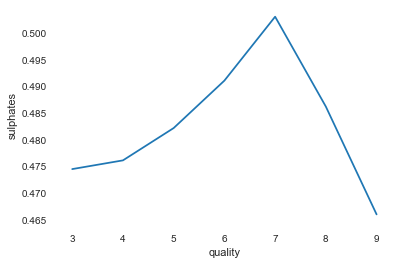

In [16]:
TrainData.groupby('quality')['sulphates'].mean().plot.line()
plt.ylabel("sulphates")

## Analysing the distribution of data points using box plot between quality and sulphates

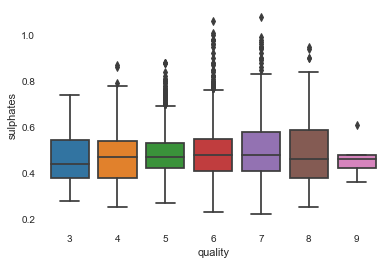

In [17]:
sns.boxplot(x="quality", y="sulphates", data=TrainData)

## Analysing the distribution of data points using box plot between quality and pH

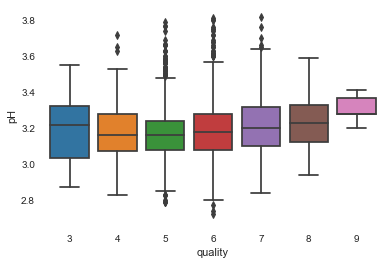

In [18]:
sns.boxplot(x="quality", y="pH", data=TrainData)

## Let's analyse the mean behaviour between quality and pH

Text(0, 0.5, 'pH')

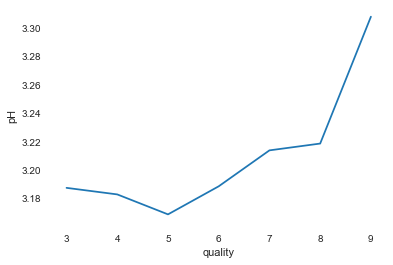

In [19]:
TrainData.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")

## Analysing the behaviour between fixed_acidity and ph using lm plot which is a combination of line and scatter plot

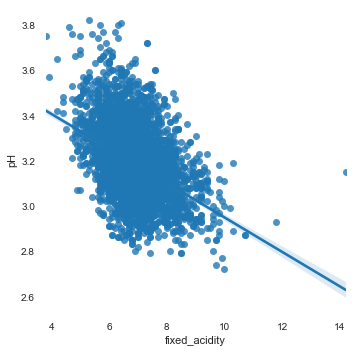

In [20]:
sns.lmplot(x="fixed_acidity", y="pH", data=TrainData)

## Analysing the behaviour between fixed_acidity and citric_acid using lm plot which is a combination of line and scatter plot

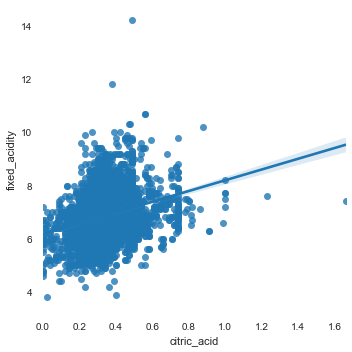

In [21]:
sns.lmplot(y="fixed_acidity", x="citric_acid", data=TrainData)

## Analysing the distribution of all the variables in the dataset using distplot

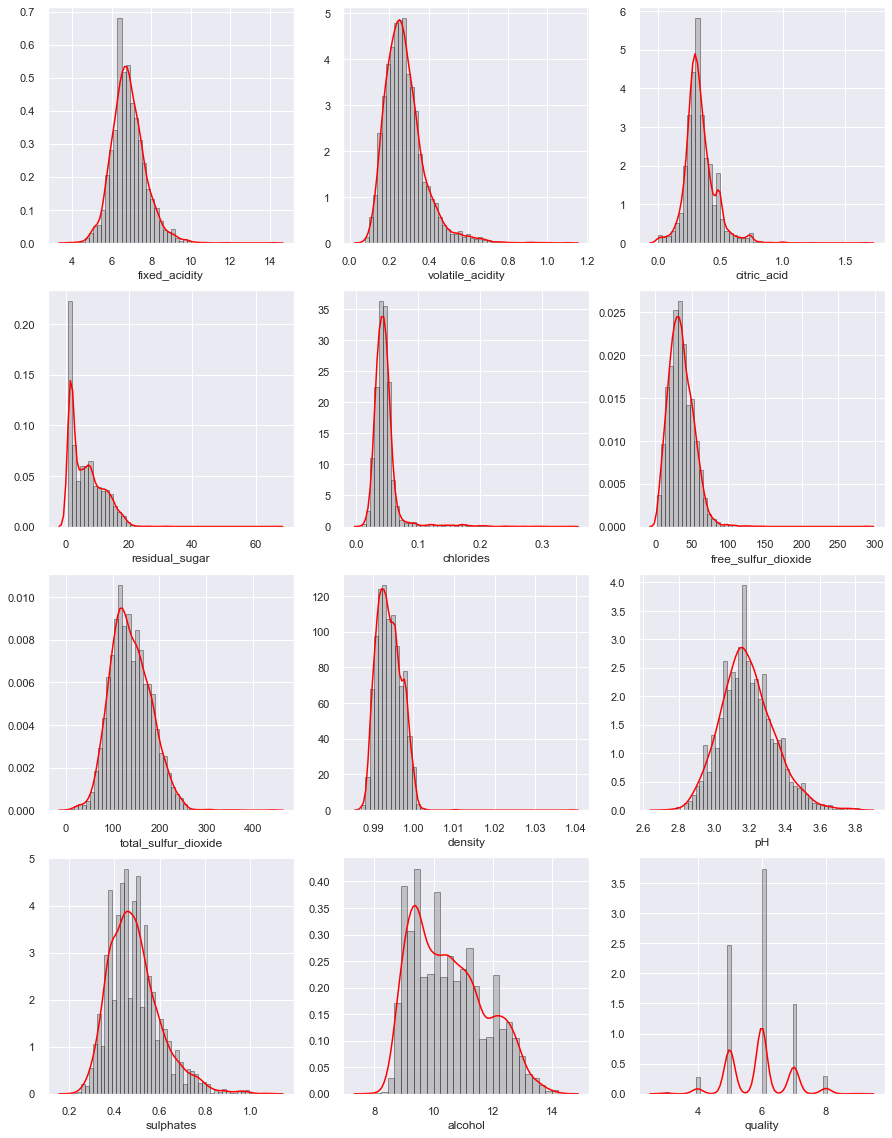

In [22]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
        'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(TrainData[col], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

## Analysing the distribution of all the variables against each other using pairplot

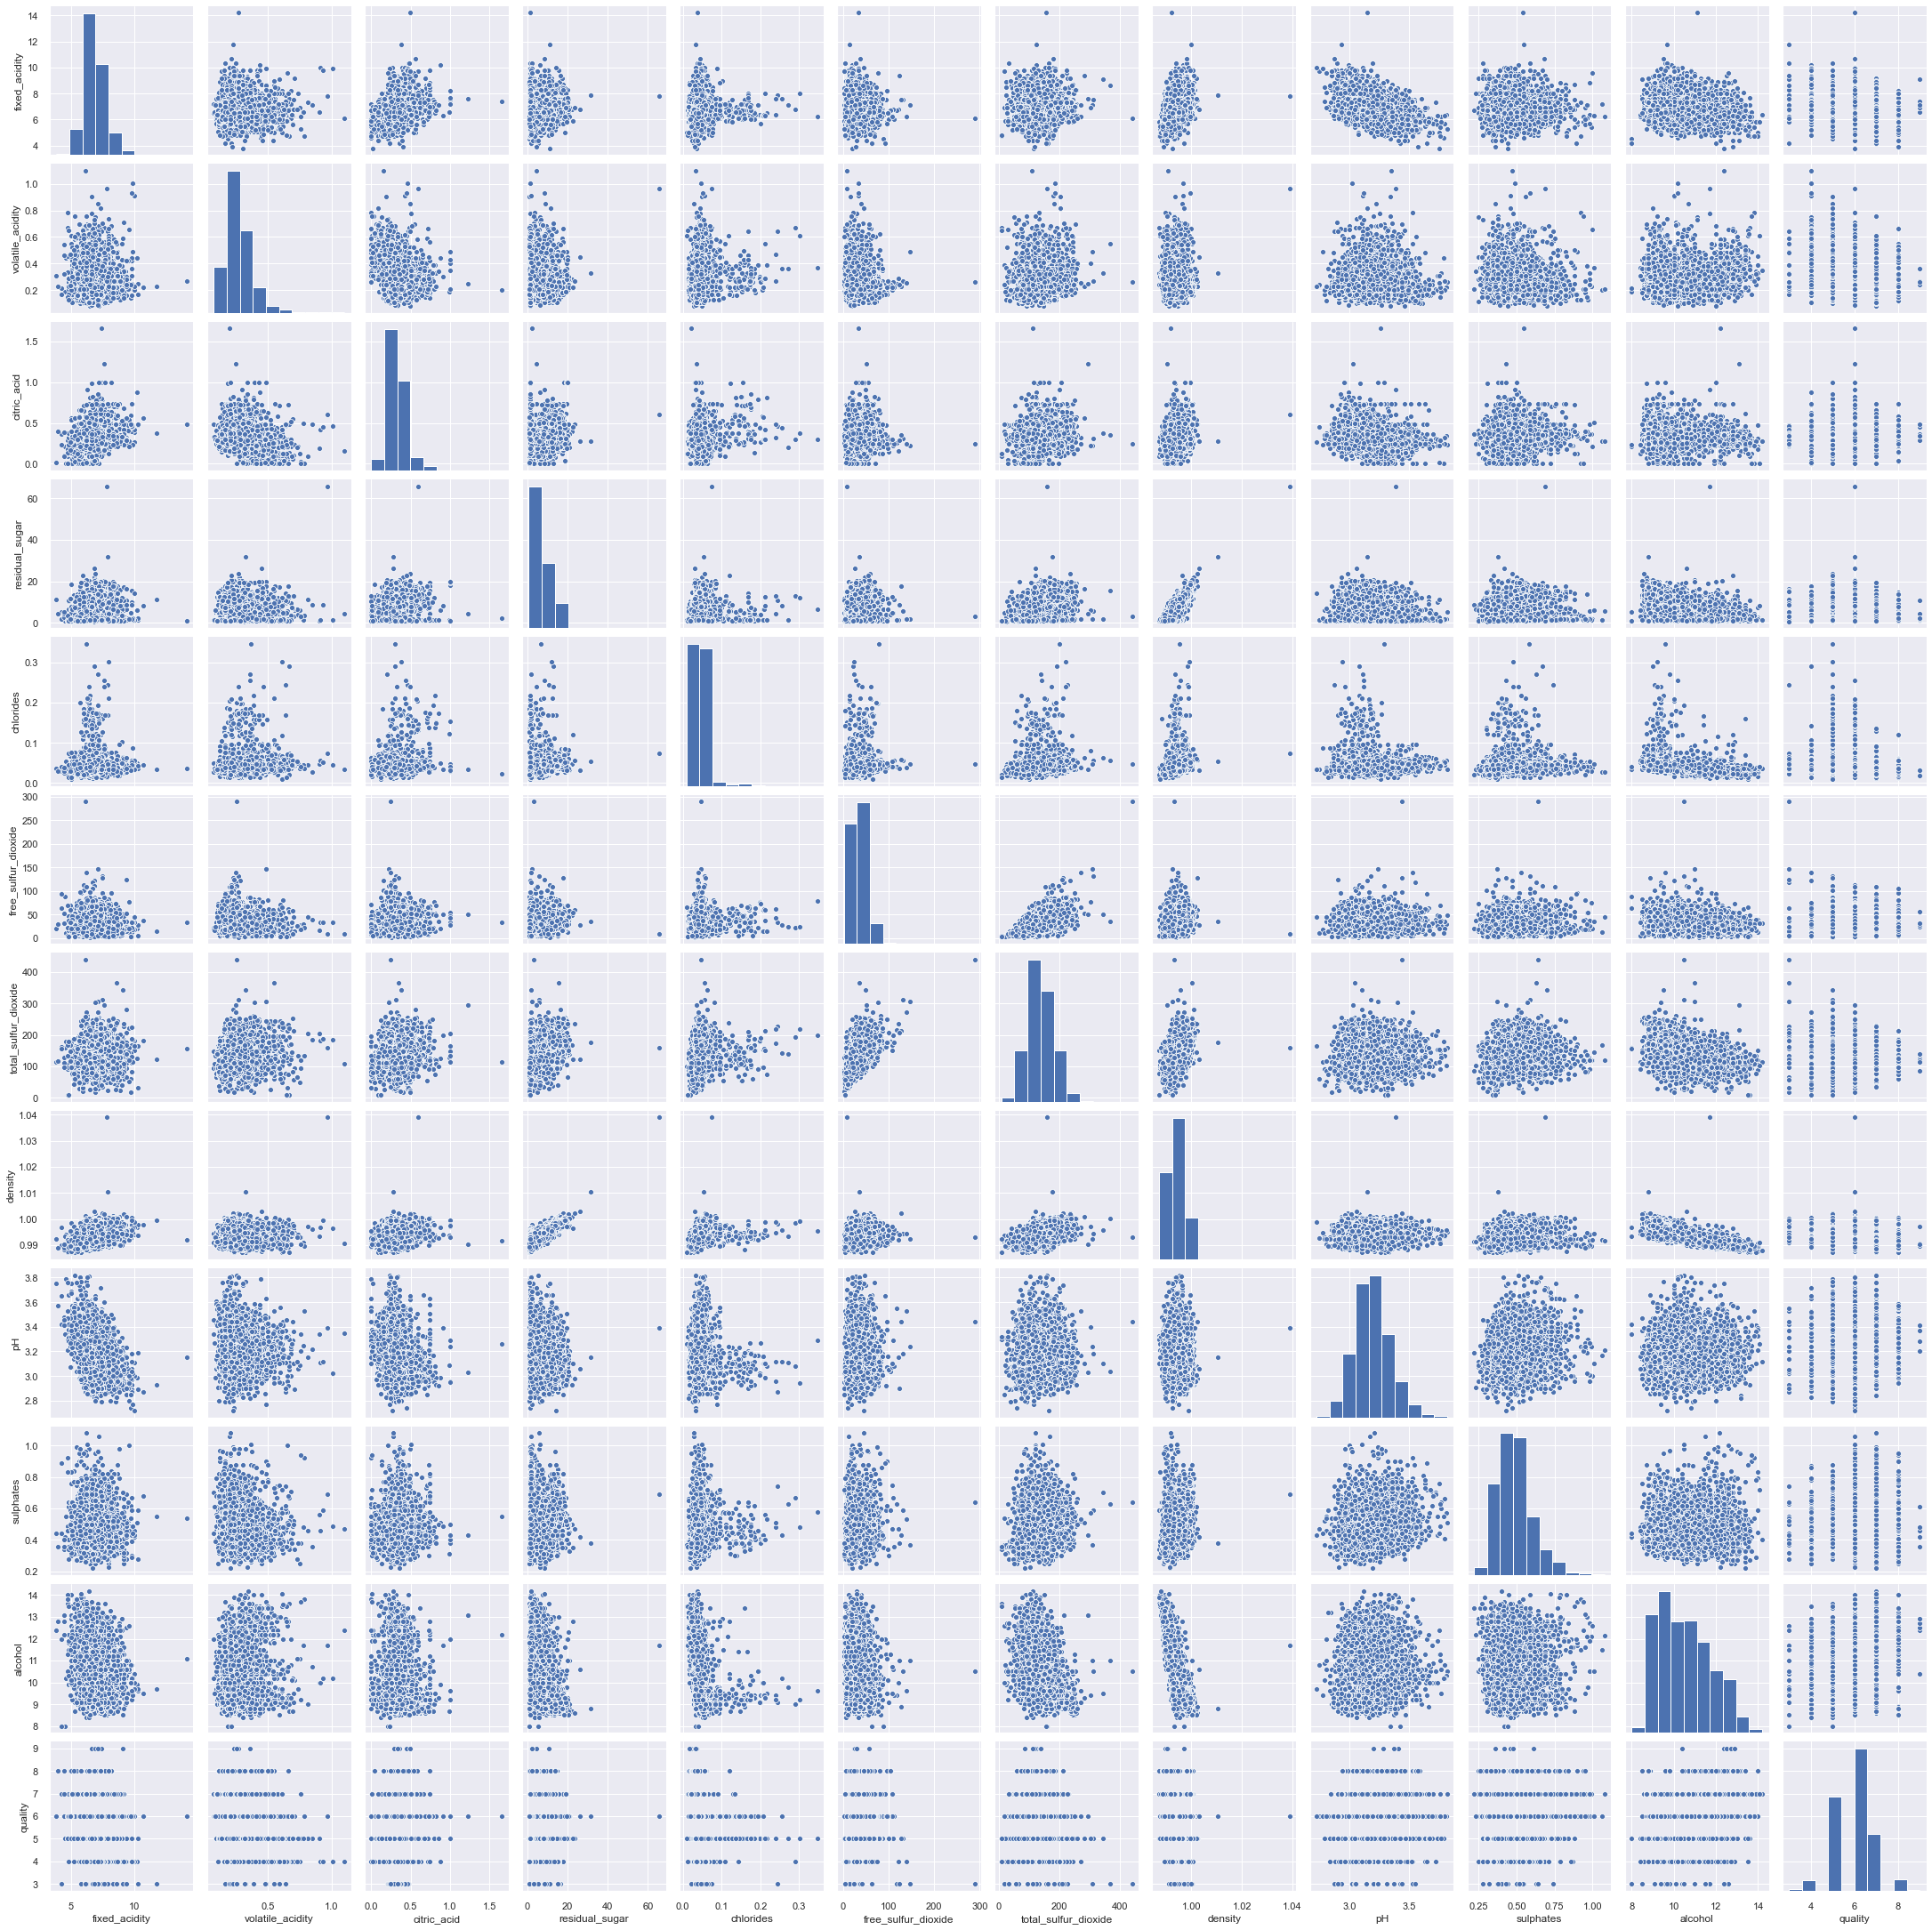

In [23]:
sns.pairplot(TrainData)
plt.show()

## Analysing the distribution of all the x variables against y variable using bar plot

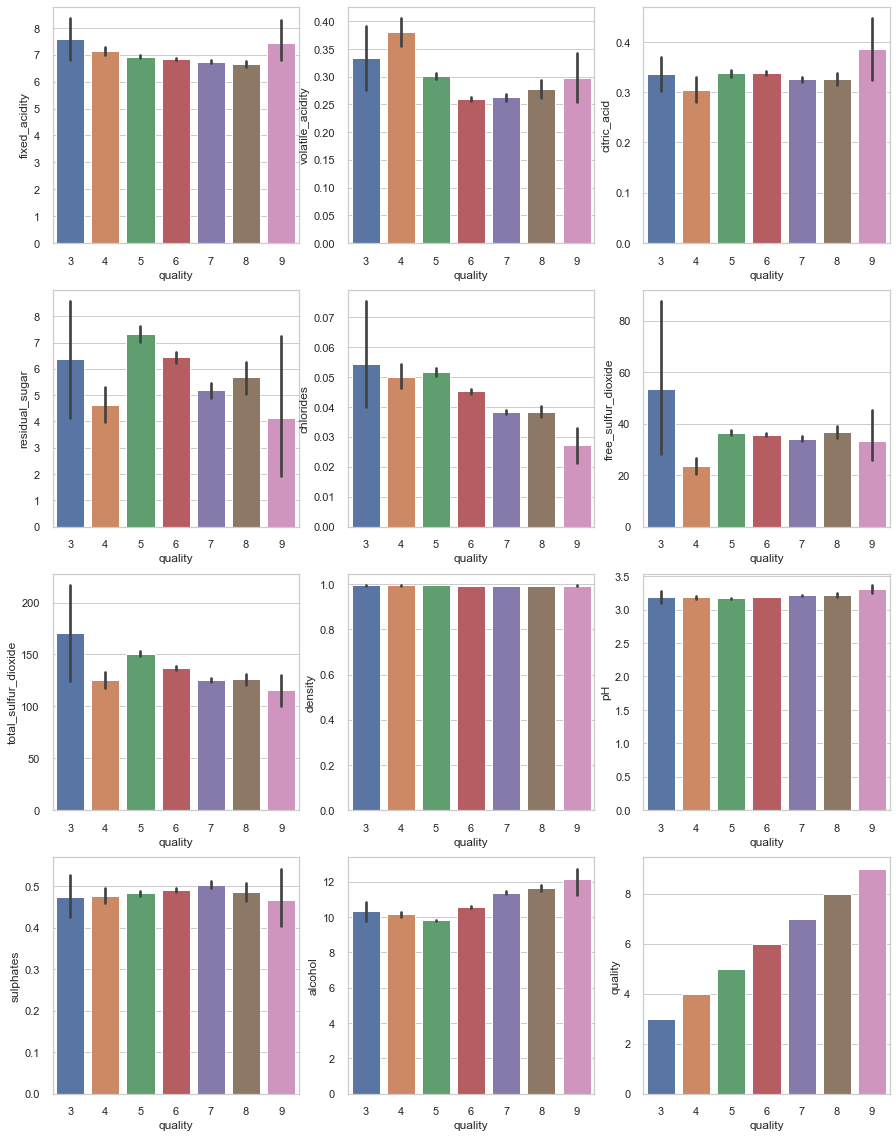

In [24]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
        'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = TrainData, x = 'quality', y = col)
    cnt+=1
plt.show() 

## Analysing the distribution of all the variables using box plot

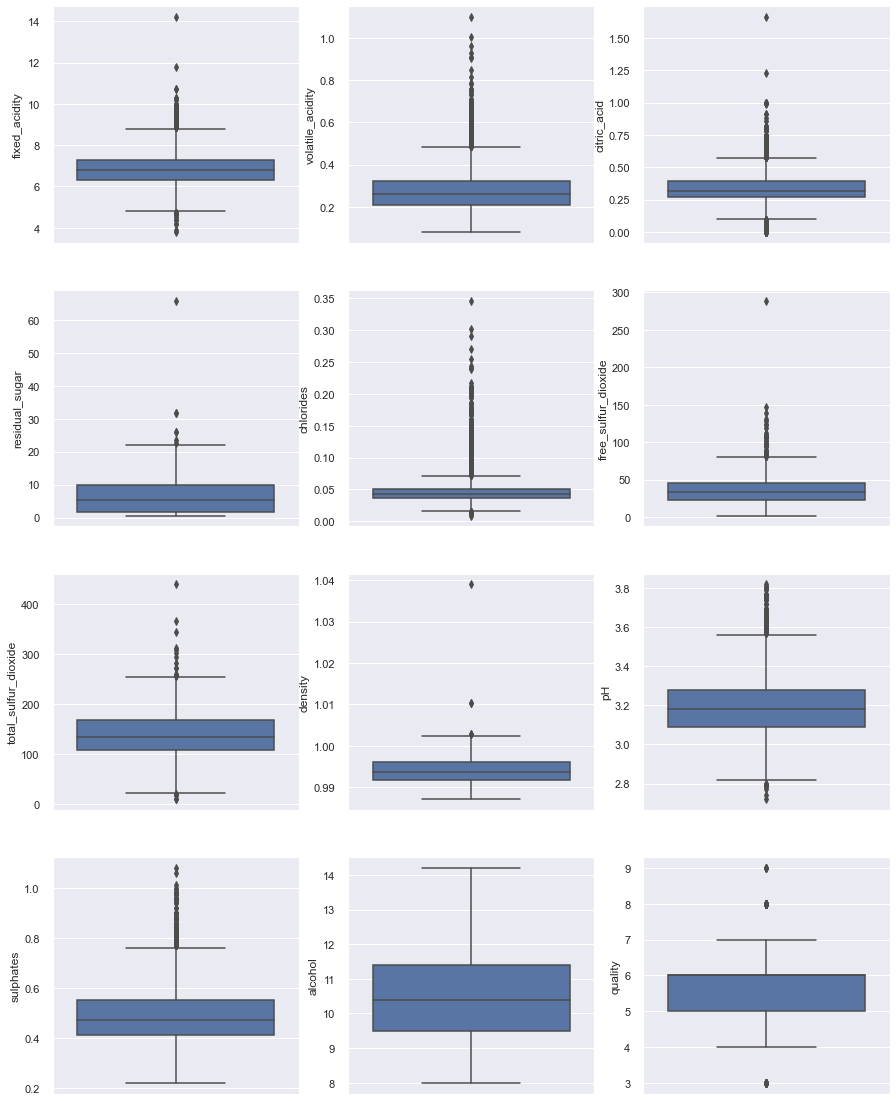

In [25]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
        'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.boxplot(data = TrainData, y = col)
    cnt+=1
plt.show()

## Analysing the distribution of all the x variables against y variable using violin plot

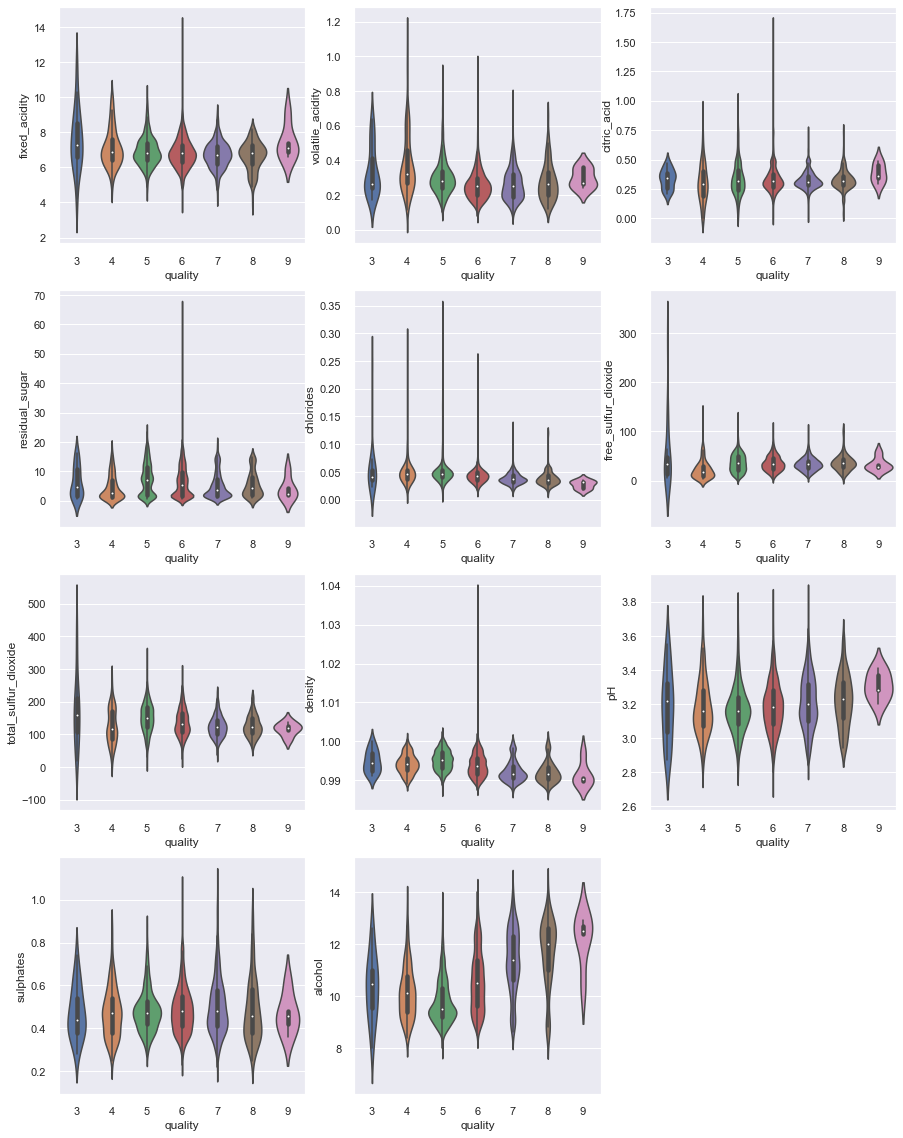

In [26]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
        'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="quality", y=col, data=TrainData)
    cnt+=1
plt.show()

# Let's begin with some preliminary modelling

## Let's first convert the y-variable into 3 buckets 1,2,3 for classification

In [27]:
reviews = []
for i in TrainData['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')

TrainData['Reviews'] = reviews
trainX = TrainData.drop(['quality', 'Reviews'] , axis = 1)
trainy = TrainData['Reviews']

## We will be transformaing all the numerical features using Standard Scalar

In [28]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, test_size = 0.2, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
score = {}

## Modelling using RandomForestClassifier Algorithm

In [29]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predicted_rfc = rfc.predict(X_test)
print(classification_report(y_test, predicted_rfc))

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.97      1.00      0.98       940
           3       0.88      0.20      0.33        35

    accuracy                           0.97       980
   macro avg       0.95      0.47      0.55       980
weighted avg       0.96      0.97      0.96       980



## Reporting confusion matrix for RandomForestClassifier Algorithm

In [30]:
rfc_conf_matrix = confusion_matrix(y_test, predicted_rfc)
rfc_acc_score = accuracy_score(y_test, predicted_rfc)
print(rfc_conf_matrix)
print(rfc_acc_score*100)
score.update({'Random_forest_classifier': rfc_acc_score*100})

[[  1   4   0]
 [  0 939   1]
 [  0  28   7]]
96.63265306122449


## Modelling using LogisticRegression Algorithm

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predicted_lr = lr.predict(X_test)
print(classification_report(y_test, predicted_lr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.96      1.00      0.98       940
           3       0.00      0.00      0.00        35

    accuracy                           0.96       980
   macro avg       0.32      0.33      0.33       980
weighted avg       0.92      0.96      0.94       980



## Reporting confusion matrix for LogisticRegression Algorithm

In [32]:
lr_conf_matrix = confusion_matrix(y_test, predicted_lr)
lr_acc_score = accuracy_score(y_test, predicted_lr)
print(lr_conf_matrix)
print(lr_acc_score*100)
score.update({'logistic_regressor': lr_acc_score*100})

[[  0   4   1]
 [  1 939   0]
 [  0  35   0]]
95.81632653061224


## Modelling using SupportVectorClassifier SVC Algorithm

In [33]:
svc =  SVC()
svc.fit(X_train, y_train)
predicted_svc = svc.predict(X_test)
print(classification_report(y_test, predicted_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.96      1.00      0.98       940
           3       0.00      0.00      0.00        35

    accuracy                           0.96       980
   macro avg       0.32      0.33      0.33       980
weighted avg       0.92      0.96      0.94       980



## Reporting confusion matrix for SupportVectorClassifier SVC Algorithm

In [34]:
svc_conf_matrix = confusion_matrix(y_test, predicted_svc)
svc_acc_score = accuracy_score(y_test, predicted_svc)
print(svc_conf_matrix)
print(svc_acc_score*100)
score.update({'SVC': svc_acc_score*100})

[[  0   5   0]
 [  0 940   0]
 [  0  35   0]]
95.91836734693877


## Modelling using DecisionTreeClassifier Algorithm

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predicted_dt = dt.predict(X_test)
print(classification_report(y_test, predicted_dt))

              precision    recall  f1-score   support

           1       0.20      0.20      0.20         5
           2       0.97      0.95      0.96       940
           3       0.19      0.29      0.23        35

    accuracy                           0.92       980
   macro avg       0.45      0.48      0.46       980
weighted avg       0.94      0.92      0.93       980



## Reporting confusion matrix for DecisionTreeClassifier Algorithm

In [36]:
dt_conf_matrix = confusion_matrix(y_test, predicted_dt)
dt_acc_score = accuracy_score(y_test, predicted_dt)
print(dt_conf_matrix)
print(dt_acc_score*100)
score.update({'DecisionTreeClassifier': dt_acc_score*100})

[[  1   4   0]
 [  4 894  42]
 [  0  25  10]]
92.3469387755102


## Modelling using GaussianNB Algorithm

In [37]:
gb = GaussianNB()
gb.fit(X_train,y_train)
predicted_gb = gb.predict(X_test)
print(classification_report(y_test, predicted_gb))

              precision    recall  f1-score   support

           1       0.13      0.40      0.20         5
           2       0.97      0.94      0.96       940
           3       0.17      0.23      0.20        35

    accuracy                           0.92       980
   macro avg       0.42      0.52      0.45       980
weighted avg       0.93      0.92      0.92       980



## Reporting confusion matrix for GaussianNB Algorithm

In [38]:
gb_conf_matrix = confusion_matrix(y_test, predicted_gb)
gb_acc_score = accuracy_score(y_test, predicted_gb)
print(gb_conf_matrix)
print(gb_acc_score*100)
score.update({'GaussianNB': gb_acc_score*100})

[[  2   3   0]
 [ 13 888  39]
 [  0  27   8]]
91.63265306122449


## Cummulating all the model results into a dataframe

In [39]:
model_acc = pd.DataFrame()
model_acc['Models'] = score.keys() 
model_acc['Accuracy'] = score.values()
model_acc

,Models,Accuracy
0,Random_forest_classifier,96.632653
1,logistic_regressor,95.816327
2,SVC,95.918367
3,DecisionTreeClassifier,92.346939
4,GaussianNB,91.632653


## Visualizing the performance of each model

### RandomForestClassifier beats all the algorithms

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

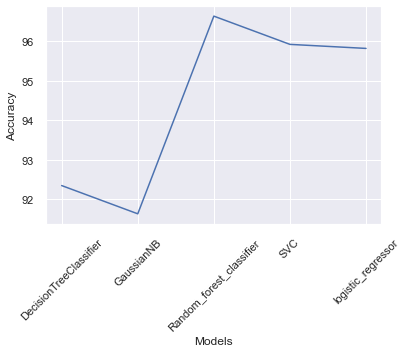

In [40]:
sns.lineplot(x='Models', y='Accuracy',data=model_acc)
xticks(rotation=45)

# Automatic EDA Python Libraries

## SweetViz Automatic EDA Tool

In [9]:
my_report = sv.analyze(TrainData)
my_report.show_html('WineQuality_EDA_SweetViz.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report WineQuality_EDA_SweetViz.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## PandasProfiling Automatic EDA Tool

In [7]:
profile = pp.ProfileReport(TrainData, title='Pandas Profiling Report', explorative=True)
profile.to_file("WineQuality_EDA_PandasProfiling.html")